<a href="https://colab.research.google.com/github/jaoviedoc/Estructuras_Hidraulicas/blob/main/Calcular_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcular   $F$ , con tipo de flujo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Datos iniciales  { run: "auto", display-mode: "both" }
y = 1.3 #@param {type:"number"}
Q = 17 #@param {type:"number"}  # m^3 . s^-1    #Caudal del canal
b = 6 #@param {type:"number"}   # m             #Ancho en la base
m = 2 #@param {type:"number"}                   #Taludes verticales
g = 9.81 # m . s^-2

Dibujo ejercicio

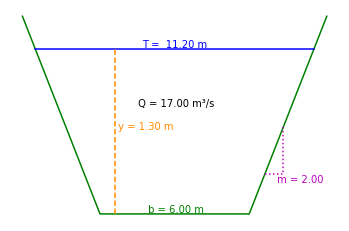

In [ ]:
#@title

y_A = y               #Altura del agua medida desde la superficie del canal
y_al = y_A*1.2        #Altura canal
T = b + 2*m*y         #Ancho superficial
A = ((b + T)/2)*y     #Area del canal

# Dibujo del canal
x_Canal = np.array([0, y_al * m, (( y_al * m) + b), (b + 2 * y_al * m)])
y_Canal = np.array([0, -y_al   , -y_al            , 0])
plt.plot(x_Canal, y_Canal, color='g')

# Dibujo de la superficie del agua
y_A_D = y_al - y_A
x_Agua = np.array([y_A_D * m    , (b + 2 * y_al * m) - (y_A_D * m)])
y_Agua = np.array([-(y_al - y_A), -(y_al - y_A)])
plt.plot(x_Agua, y_Agua, color='b')

# Cota y
x_E_y = np.array([(y_al * m) + (b/10), (y_al * m) + (b/10)])
y_E_y = np.array([-y_al, -y_A_D])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Dibujo pendiente del canal
if m > 0:
  y_C_M = y_al - (y_al * 0.2)
  x_M = np.array([(b + 2 * y_al * m) - (y_C_M * m), (b + 2 * y_al * m)-((y_C_M * m)*0.7), (b + 2 * y_al * m)-((y_C_M * m)*0.7)])
  y_M_A = ((((b + 2 * y_al * m)-((y_C_M * m)*0.7))-((b + 2 * y_al * m) - (y_C_M * m)))/m)-y_C_M
  y_M = np.array([-y_C_M , -y_C_M , y_M_A])
  plt.plot(x_M, y_M, color='m', linestyle=':')
  x_M_L = (((b + 2 * y_al * m)-((y_C_M * m)*0.7))+((b + 2 * y_al * m) - (y_C_M * m)))/2
  plt.text(x_M_L , -y_C_M,  f' m = {m:.2f}' , ha='left', va='top' , c='m')

# Textos
plt.text( (y_al * m) + (b/2), -y_A_D,  f'T =  {T:.2f} m' , ha='center', va='bottom' , c='b')
plt.text((y_al * m) + (b/10), -((y_al+y_A_D)/2) ,  f' y = {y:.2f} m' , ha='left', va='bottom', c='darkorange', )
plt.text((y_al * m) + (b/2), -((y_al+y_A_D)/2.5) ,  f' Q = {Q:.2f} m³/s' , ha='center', va='bottom', c='k')
plt.text( (y_al * m) + (b/2), -y_al,  f' b = {b:.2f} m' , ha='center', va='bottom', c='g')

plt.axis('off')

plt.show()


In [ ]:
#@title
from math import sqrt
#F = Q / np.sqrt ((g * ((b*y + m*y**2)**3)) / (b + 2*y*m))

#Definicion de la ecuación del numero de Froude
def ecuacion (y, x):
  return sqrt ((g * ((b*y + m*y**2)**3)) / (b + 2*y*m)) - x

In [ ]:
from scipy.optimize import fsolve

#Solucion para cuando Froude es igual a 1
sol = fsolve(lambda y: ecuacion(y, Q),1)
print("El valor de y_c es:", sol[0])

El valor de y_c es: 0.8468198255736797


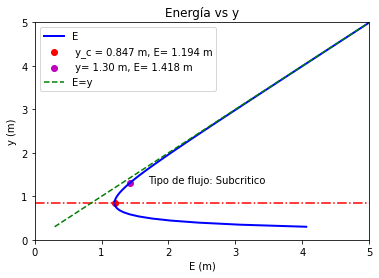

In [ ]:
#@title

#Linea de Energia especifica
y_range = np.linspace(0.3, 5, 100)
E = y_range + ((Q**2)/(((b*y_range + m*y_range**2)**2)*2*g))
plt.plot(E, y_range, c = 'b', linewidth=2, label = 'E')

#Punto Y critico
y_c = sol[0]
E_c = y_c + ((Q**2)/(((b*y_c + m*y_c**2)**2)*2*g))
plt.scatter(E_c, y_c, c='r', label=f' y_c = {y_c:.3f} m, E= {E_c:.3f} m')

#Linea Y critica
E_rango_c = np.array([0, 5])
y_rango_c = np.array([y_c, y_c])
plt.plot(E_rango_c, y_rango_c, c = 'r', linestyle='-.')

#Punto Y dado en el ejercicio
E_y_dado = y + ((Q**2)/(((b*y + m*y**2)**2)*2*g))
plt.scatter(E_y_dado, y, c='m', label=f' y= {y:.2f} m, E= {E_y_dado:.3f} m')

#Para definir el tipo de flujo
if y > y_c:
  Tipo_Flujo = 'Subcritico'
elif y < y_c:
  Tipo_Flujo = 'Supercritico'
else:
  Tipo_Flujo = 'Critico'

#tipo de flujo
plt.text(E_y_dado*1.2, y, f"Tipo de flujo: {Tipo_Flujo}")

#Linea a 45° o E=y
E_igual_Y = y_range
plt.plot(E_igual_Y, y_range, c = 'g', label = 'E=y', linestyle='--')

#Formato grafica
plt.xlabel('E (m)')
plt.ylabel('y (m)')
plt.title('Energía vs y')
plt.legend()
plt.axis([0, 5, 0, 5])
plt.show()

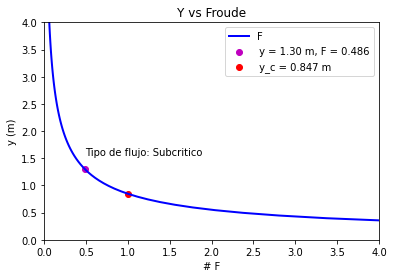

In [ ]:
#@title

#Linea funcion numero de froude
y_range = np.linspace(0.1, 5, 100)
FF = Q / np.sqrt ((g * ((b*y_range + m*y_range**2)**3)) / (b + 2*y_range*m))
plt.plot(FF, y_range, c = 'b', linewidth=2, label = 'F')

#Froude para Y dado en ejercicio
F_y_dada = Q / np.sqrt ((g * ((b*y + m*y**2)**3)) / (b + 2*y*m))
plt.scatter(F_y_dada, y, c='m', label=f' y = {y:.2f} m, F = {F_y_dada:.3f}')

#Tipo de flujo
plt.text(F_y_dada, y*1.2, f"Tipo de flujo: {Tipo_Flujo}")

#Froude para Y critico
F_prob= 1
y_c = sol[0]
plt.scatter(F_prob, y_c, c='r', label=f' y_c = {y_c:.3f} m')

#Formato grafica
plt.axis([0, 4, 0, 4])
plt.xlabel('# F')
plt.ylabel('y (m)')
plt.title('Y vs Froude')
plt.legend()
plt.show()